In [1]:
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
%matplotlib inline
 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [9]:
df_sleep =pd.read_csv('./2018_sleep.csv').sort_values('total_sleep_time')
df_sleep_class = pd.read_csv('./sleep_with_class.csv').sort_values('total_sleep_time')
df_class_model_data = pd.read_csv('./real_finalwith_class_modeldata.csv')

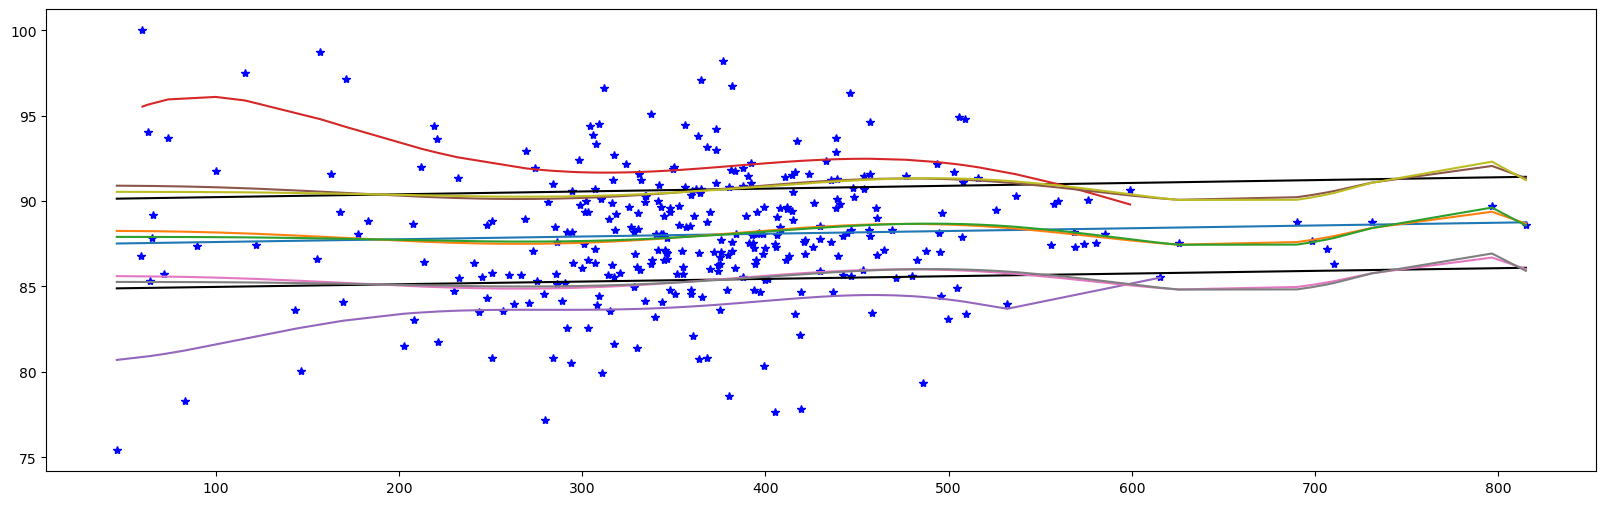

In [28]:
## 각 회귀식에 대한 정의
x0 = df_sleep['total_sleep_time']/60
y0 = df_sleep['sleep_score']
line_fitter = LinearRegression()
line_fitter.fit(x0.values.reshape(-1,1),y0)

### 짝수 차항중 가장 오차가 적은 8차
pr8 = LinearRegression()
octa0 = PolynomialFeatures(degree=8)
x_octa0 = octa0.fit_transform(x0.values.reshape(-1,1))
pr8.fit(x_octa0,y0)
y_octa_fit0 = pr8.predict(octa0.fit_transform(x0.values.reshape(-1,1)))



### 홀수 차항중 가장 오차가 적은 9차
pr9 = LinearRegression()
Nona0= PolynomialFeatures(degree=9)
x_Nona0 = Nona0.fit_transform(x0.values.reshape(-1,1))
pr9.fit(x_Nona0,y0)
y_Nona_fit0 = pr9.predict(Nona0.fit_transform(x0.values.reshape(-1,1)))




### 이전 작업에서 구분한 class 를 통한 데이터 구분
df_sleep_class_A= df_sleep_class[df_sleep_class['Class']=='A']
x2 = df_sleep_class_A['total_sleep_time']/60
y2 = df_sleep_class_A['sleep_score']
df_sleep_class_B= df_sleep_class[df_sleep_class['Class']=='B']
x3 = df_sleep_class_B['total_sleep_time']/60
y3 = df_sleep_class_B['sleep_score']
df_sleep_class_C= df_sleep_class[df_sleep_class['Class']=='C']


### 이전 작업에서 구분한 class 를 통한 A(최하단) 회귀
pr5 = LinearRegression()
penta= PolynomialFeatures(degree=5)
x_penta = penta.fit_transform(x2.values.reshape(-1,1))
pr5.fit(x_penta,y2)
y_penta_fit = pr5.predict(penta.fit_transform(x2.values.reshape(-1,1)))


### 이전 작업에서 구분한 class 를 통한 B(최하단) 회귀
pr7 = LinearRegression()
sev= PolynomialFeatures(degree=7)
x_sev = sev.fit_transform(x3.values.reshape(-1,1))
pr7.fit(x_sev,y3)
y_sev_fit = pr7.predict(sev.fit_transform(x3.values.reshape(-1,1)))


plt.figure(figsize=(20,6))
plt.plot(x0,y0,'*b')
plt.plot(x0,line_fitter.predict(x0.values.reshape(-1,1)))
plt.plot(x0,1.03*line_fitter.predict(x0.values.reshape(-1,1)),'black')
plt.plot(x0,0.97*line_fitter.predict(x0.values.reshape(-1,1)),'black')
plt.plot(x0,y_octa_fit0)
plt.plot(x0,y_Nona_fit0)
plt.plot(x2,y_penta_fit)
plt.plot(x3,y_sev_fit)
plt.plot(x0,y_octa_fit0*1.03)
plt.plot(x0 ,y_octa_fit0*0.97)
plt.plot(x0,y_Nona_fit0*0.97)
plt.plot(x0,y_Nona_fit0*1.03)
plt.show()


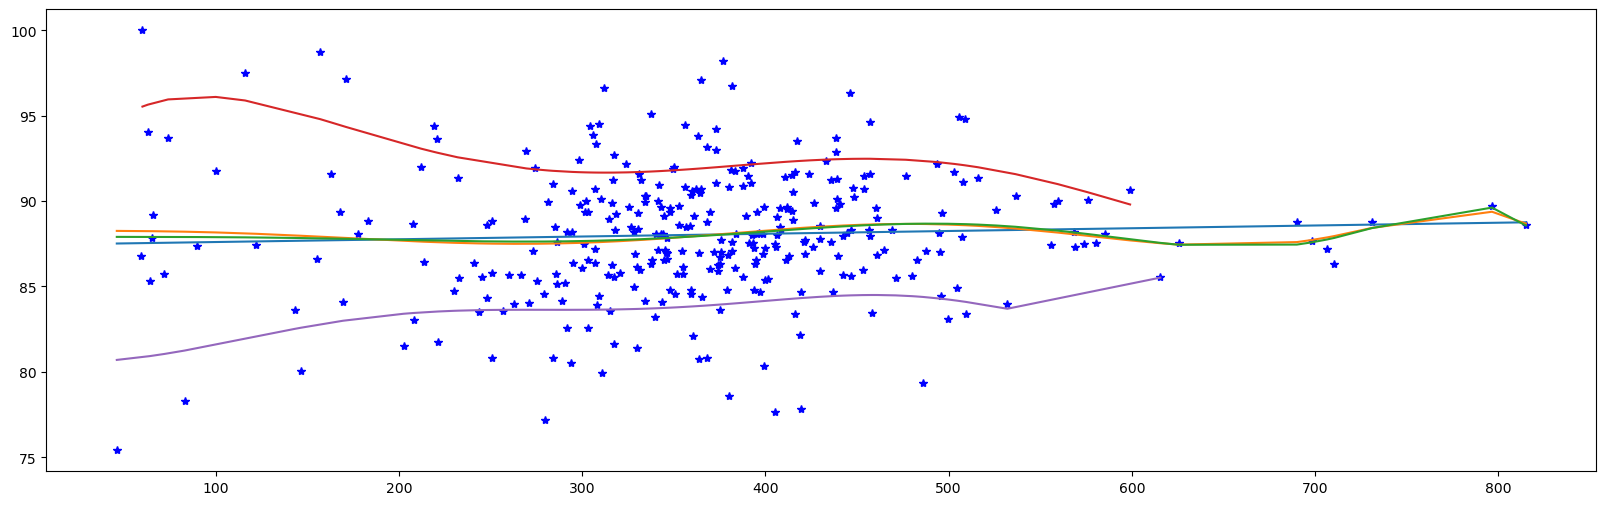

In [29]:

plt.figure(figsize=(20,6))
plt.plot(x0,y0,'*b')
plt.plot(x0,line_fitter.predict(x0.values.reshape(-1,1)))
plt.plot(x0,y_octa_fit0)
plt.plot(x0,y_Nona_fit0)
plt.plot(x2,y_penta_fit)
plt.plot(x3,y_sev_fit)
plt.show()


In [31]:
x1=df_sleep_class_C['total_sleep_time']/60
y1=df_sleep_class_C['sleep_score']
line_fitter_1 = LinearRegression()
line_fitter_1.fit(x1.values.reshape(-1,1),y1)


pr8_1= LinearRegression()
octa1 = PolynomialFeatures(degree=8)
x_octa1 = octa1.fit_transform(x1.values.reshape(-1,1))
pr8_1.fit(x_octa1,y1)
y_octa_fit1= pr8_1.predict(octa1.fit_transform(x1.values.reshape(-1,1)))



pr9_1 = LinearRegression()
Nona1= PolynomialFeatures(degree=9)
x_Nona1 = Nona1.fit_transform(x1.values.reshape(-1,1))
pr9_1.fit(x_Nona1,y1)
y_Nona_fit1 = pr9_1.predict(Nona1.fit_transform(x1.values.reshape(-1,1)))


In [34]:
df_sleep_class_C['E00']= line_fitter.predict(x1.values.reshape(-1,1))-y1
df_sleep_class_C['E01']= y_octa_fit1-y1
df_sleep_class_C['E02']= y_Nona_fit1-y1
df_sleep_class_A['E03']= y_penta_fit-y2
df_sleep_class_B['E04']= y_sev_fit-y3


C:\Users\jhm21\AppData\Local\Temp\ipykernel_3136\16481768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sleep_class_C['E00']= line_fitter.predict(x1.values.reshape(-1,1))-y1
C:\Users\jhm21\AppData\Local\Temp\ipykernel_3136\16481768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sleep_class_C['E01']= y_octa_fit1-y1
C:\Users\jhm21\AppData\Local\Temp\ipykernel_3136\16481768.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

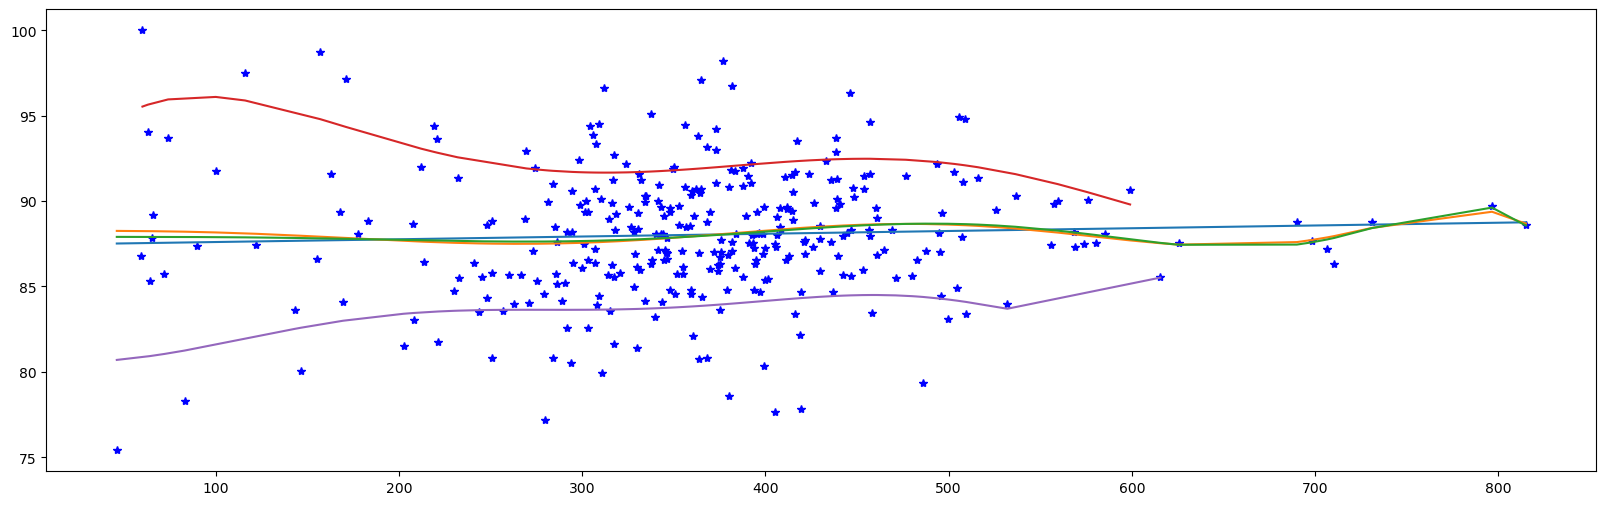

In [75]:

plt.figure(figsize=(20,6))
plt.plot(x0,y0,'*b')
plt.plot(x0,line_fitter.predict(x0.values.reshape(-1,1)))
plt.plot(x0,y_octa_fit0)
plt.plot(x0,y_Nona_fit0)
plt.plot(x2,y_penta_fit)
plt.plot(x3,y_sev_fit)
plt.show()


In [ ]:
line_fitter.predict(x0.values.reshape(-1,1))+

In [76]:
import numpy as np

In [80]:
## split_and_approximate과정을 통해 얻은 회귀계수
coef=(-9.47603783e-05, -3.76289056e-04, -1.80760166e-04,  1.22708439e-04,-8.51939736e-04, -1.75352455e-03, -1.73261612e-03, -1.42385207e-04,1.83339655e-03, -2.45733732e-03, -1.37690857e-03,  7.44744126e-03)
inter= 2.8285991102448507

In [82]:
## 활동에 대한 파일 병함
for i in range(1,31):
    df=pd.read_csv('./user{}_worktime.csv'.format(i))

In [95]:
dfk=pd.read_csv('./final.csv')
dfk

,Unnamed: 0.1,Unnamed: 0,E00,E01,E02,Month,Day,study,recreation_etc,travel,meal,household,personal_care,work,hobby,entertainment,recreation_media,communitiy_interaction,socialising,outdoor_act
0,5,5,5.334041,4.953823,5.066810,10,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,5,0.400655,0.720778,0.656476,10,31,0.0,0.0,-561.0,82.0,0.0,0.0,478.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,-2.701078,-2.777238,-2.790654,10,31,0.0,0.0,101.0,48.0,0.0,0.0,-167.0,0.0,0.0,16.0,0.0,1.0,0.0
3,1,1,2.592001,2.207925,2.335748,10,31,0.0,0.0,101.0,48.0,0.0,0.0,-167.0,0.0,0.0,16.0,0.0,1.0,0.0
4,1,1,-0.753809,-0.470792,-0.535793,10,31,0.0,48.0,85.0,50.0,47.0,5.0,-259.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,4,4,2.762715,2.378374,2.497014,11,28,107.0,-432.0,248.0,21.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0
294,1,1,2.234692,2.595826,2.534679,11,28,201.0,145.0,93.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
295,7,7,-0.378615,-0.693952,-0.622763,11,28,0.0,-283.0,45.0,75.0,39.0,59.0,0.0,64.0,0.0,0.0,0.0,0.0,0.0
296,2,2,2.663965,2.861536,2.800423,11,28,0.0,0.0,146.0,0.0,0.0,0.0,164.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
### 새로운 컬럼에 활동과 보정식을 통한 오차 보정값 저장
dfk['E_p']=(pd.read_csv('./final.csv').iloc[:,7:-1]*coef).sum(axis=1)
dfk['E_p']=dfk['E_p']+inter
dfk['E_origin_mean']=(dfk[['E00','E01','E02']].sum(axis=1)/3)
dfk

,Unnamed: 0.1,Unnamed: 0,E00,E01,E02,Month,Day,study,recreation_etc,travel,...,personal_care,work,hobby,entertainment,recreation_media,communitiy_interaction,socialising,outdoor_act,E_p,E_origin_mean
0,5,5,5.334041,4.953823,5.066810,10,30,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.828599,5.118224
1,5,5,0.400655,0.720778,0.656476,10,31,0.0,0.0,-561.0,...,0.0,478.0,0.0,0.0,0.0,0.0,0.0,0.0,2.111877,0.592636
2,0,0,-2.701078,-2.777238,-2.790654,10,31,0.0,0.0,101.0,...,0.0,-167.0,0.0,0.0,16.0,0.0,1.0,0.0,3.073709,-2.756324
3,1,1,2.592001,2.207925,2.335748,10,31,0.0,0.0,101.0,...,0.0,-167.0,0.0,0.0,16.0,0.0,1.0,0.0,3.073709,2.378558
4,1,1,-0.753809,-0.470792,-0.535793,10,31,0.0,48.0,85.0,...,5.0,-259.0,0.0,0.0,0.0,0.0,0.0,0.0,3.201247,-0.586798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,4,4,2.762715,2.378374,2.497014,11,28,107.0,-432.0,248.0,...,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,2.892076,2.546034
294,1,1,2.234692,2.595826,2.534679,11,28,201.0,145.0,93.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.738180,2.455066
295,7,7,-0.378615,-0.693952,-0.622763,11,28,0.0,-283.0,45.0,...,59.0,0.0,64.0,0.0,0.0,0.0,0.0,0.0,2.790362,-0.565110
296,2,2,2.663965,2.861536,2.800423,11,28,0.0,0.0,146.0,...,0.0,164.0,0.0,0.0,0.0,0.0,0.0,0.0,2.518059,2.775308


In [121]:
### 이전 오차 대비 보정된후 보정정도계산
(abs(dfk['E00']).mean()-abs(dfk['E_p']).mean())/abs(dfk['E00']).mean()*100,(abs(dfk['E01']).mean()-abs(dfk['E_p']).mean())/abs(dfk['E01']).mean()*100,(abs(dfk['E02']).mean()-abs(dfk['E_p']).mean())/abs(dfk['E02']).mean()*100



(-20.047720233939117, -20.310703790425475, -20.528375406202585)

In [115]:
print('기존 오차에 대해 {}%만큼의 보정효과 발생'.format(abs(((dfk['E_origin_mean']-dfk['E_p'])/dfk['E_origin_mean']).mean())*100))

기존 오차에 대해 24.932341836056107%만큼의 보정효과 발생
